In [1]:
import numpy as np

In [2]:
from adjustText import adjust_text

In [3]:
import verdict

In [4]:
import cc.atlas as atlas

# Load

In [5]:
a = atlas.Atlas( '../cc/tests/data/example_atlas', bibtex_fp='../cc/tests/data/example_atlas/example.bib' )

Loading bibliography entries.


100%|██████████| 10/10 [00:00<00:00, 5500.73it/s]

Storing bibliography entries.
Loading saved atlas data.



100%|██████████| 10/10 [00:00<00:00, 27112.50it/s]


#### Process the bibtex notes.

In [6]:
a.data.process_bibtex_annotations( word_per_concept=True )
a.data.identify_unique_key_concepts()

Dict, {
'VandeVoort2018a' : None,
'Stern2018' : None,
'Howk2017' : None,
'Garrison-kimmel2017' : None,
'Hopkins2017' : None,
'Hafen2016' : None,
'Muratov2016' : None,
'VandeVoort2016' : None,
'Hafen2019' : None,
'Hafen2019a' : None,
}

In [7]:
a.data['Hafen2019'].process_abstract()

In [8]:
# Retrieve Atlas Data
for key, item in a.data.items():
    print( key )
    item.process_abstract()

VandeVoort2018a
Stern2018
Howk2017
Garrison-kimmel2017
Hopkins2017
Hafen2016
Muratov2016
VandeVoort2016
Hafen2019
Hafen2019a


In [9]:
saved_data = a.save_data()

100%|██████████| 10/10 [00:00<00:00, 18283.80it/s]

Preparing to save data.
Saving to ../cc/tests/data/example_atlas/atlas_data.h5


# Plot

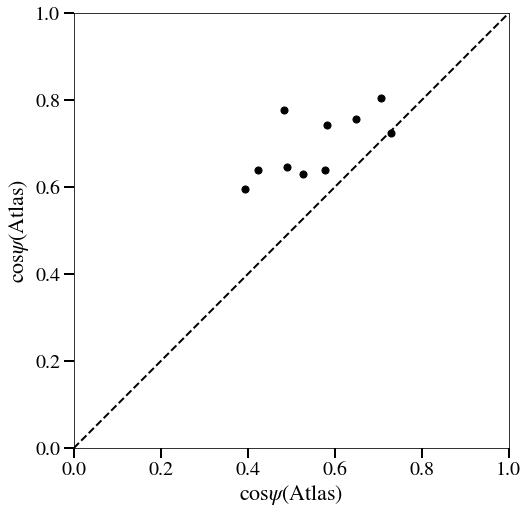

In [10]:
%matplotlib inline

figure = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

cospsi_a, cospsi_a_abs = a.plot_cospsi2d(
    a,
    a,
    y_kwargs = { 'method': 'abstract similarity'},
    ax = ax,
)

ax.plot(
    [ 0, 1 ],
    [ 0, 1 ],
    linestyle = '--',
    linewidth = 2,
    color = 'k',
)

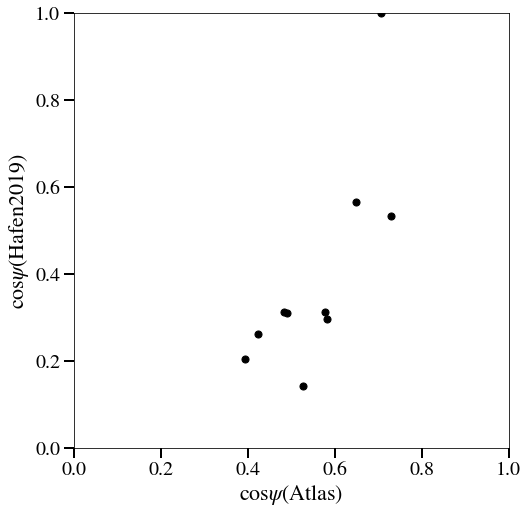

In [11]:
%matplotlib inline

cospsi_a, cospsi_h19 = a.plot_cospsi2d(
    a,
    a.data['Hafen2019'],
)

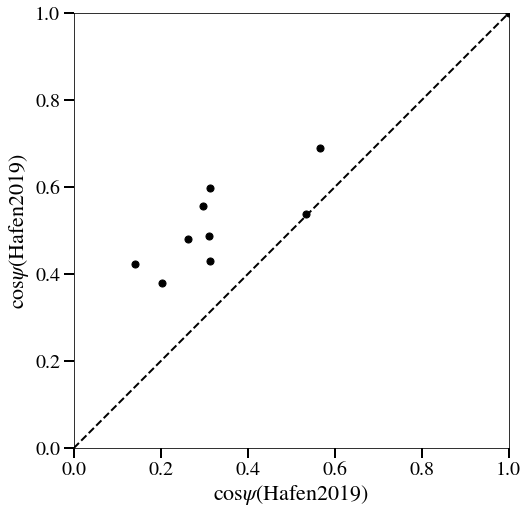

In [12]:
figure = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

cospsi_a, cospsi_h19 = a.plot_cospsi2d(
    a.data['Hafen2019'],
    a.data['Hafen2019'],
    y_kwargs = { 'method': 'abstract similarity'},
    ax = ax,
)

ax.plot(
    [ 0, 1 ],
    [ 0, 1 ],
    linestyle = '--',
    linewidth = 2,
    color = 'k',
)

# Reference-Based Exploration

## Populate

### Populate with Referenced Works
Can be done iteratively.

* Identify works to download
* Download
* Create bib
* Create atlas
* Combine atlases

### Populate with Citing Works
Can be done iteratively.

## Visualize

$\cos \Psi$ for
* central works
* a couple of concept vectors
* the vector that describes your upcoming publication
* a vector that predicts high citability 

## Select

## Read

### Download Full Text from ArXiv

### Open PDF/Mendeley Externally
While this might seem excessive, QoL differences like this are important.

### Open Figures in NB

### Natural Language Processing of Text to Create a Summary PDF

# Scratch

In [186]:
import bibtexparser

In [187]:
import ads

In [188]:
import numpy as np

In [189]:
q = ads.ExportQuery( [ '2020MNRAS.492.3465H' ], format='bibtex' )

In [190]:
bibtex_str = q.execute()

for i in range( 20 ):
    bibtex_str = bibtex_str.replace( '\n ', '\n' )

bibtex_str = bibtex_str.replace( 'ARTICLE', 'article' )

bibtex_str = bibtex_str.replace( '2020MNRAS.492.3465H', 'Hopkins2019' )

bibtex_str = bibtex_str.replace( '\mnras', 'MNRAS' )

bibtex_str = bibtex_str[:-1]

In [191]:
# Reformat some lines
# This is not optimized.
l = []
for line in bibtex_str.split( '\n' ):
    
    # ADS puts quotes instead of double brackes around the title
    if 'title =' in line:
        bibtex_str = bibtex_str.replace( '"{', '{{' ).replace( '}"', '}}' )
    
    # ADS' bib export for months doesn't have brackets around it...
    if 'month =' in line:
        line = line.replace( '= ', '= {' ).replace( ',', '},' )
        
    l.append( line )
bibtex_str = '\n'.join( l )

In [192]:
fp = './test.bib'
actual_fp = './actual.bib'

In [193]:
with open( fp, 'w' ) as f:
    f.write( bibtex_str )

In [194]:
with open( fp, 'r' ) as f:
#     test_output = f.read( -1 )
    bib_database = bibtexparser.load( f )

In [195]:
bib_database.entries

[{'ENTRYTYPE': 'article',
  'ID': '2020MNRAS.492.3465H',
  'adsnote': 'Provided by the SAO/NASA Astrophysics Data System',
  'adsurl': 'https://ui.adsabs.harvard.edu/abs/2020MNRAS.492.3465H',
  'archiveprefix': 'arXiv',
  'author': "{Hopkins}, Philip F. and {Chan}, T.~K. and {Garrison-Kimmel}, Shea and\n{Ji}, Suoqing and {Su}, Kung-Yi and {Hummels}, Cameron B. and\n{Kere{\\v{s}}}, Du{\\v{s}}an and {Quataert}, Eliot and\n{Faucher-Gigu{\\`e}re}, Claude-Andr{\\'e}",
  'doi': '10.1093/mnras/stz3321',
  'eprint': '1905.04321',
  'journal': '\\mnras',
  'keywords': 'stars: formation, galaxies: active, galaxies: evolution, galaxies: formation, cosmology: theory, Astrophysics - Astrophysics of Galaxies, Astrophysics - Cosmology and Nongalactic Astrophysics, Astrophysics - High Energy Astrophysical Phenomena',
  'month': 'mar',
  'number': '3',
  'pages': '3465-3498',
  'primaryclass': 'astro-ph.GA',
  'title': '{But what about...: cosmic rays, magnetic fields, conduction, and viscosity in gala

In [73]:
with open( actual_fp, 'r' ) as f:
#     output = f.read( -1 )
    bib_database = bibtexparser.load( f )

In [74]:
bib_database.entries

[{'ENTRYTYPE': 'article',
  'ID': 'Hopkins2019',
  'archiveprefix': 'arXiv',
  'arxivid': '1905.04321',
  'author': "Hopkins, Philip F. and Chan, T. K. and Garrison-Kimmel, Shea and Ji, Suoqing and Su, Kung-Yi and Hummels, Cameron B. and Kere{\\v{s}}, Du{\\v{s}}an and Quataert, Eliot and Faucher-Gigu{\\`{e}}re, Claude-Andr{\\'{e}}",
  'doi': '10.1093/mnras/stz3321',
  'eprint': '1905.04321',
  'file': ':Users/zhafen/Library/Application Support/Mendeley Desktop/Downloaded/Hopkins et al. - 2019 - But What About... Cosmic Rays, Magnetic Fields, Conduction, {\\&}amp Viscosity in Galaxy Formation.pdf:pdf',
  'issn': '0035-8711',
  'journal': 'MNRAS',
  'month': 'mar',
  'number': '3',
  'pages': '3465--3498',
  'title': '{But what about...: cosmic rays, magnetic fields, conduction, and viscosity in galaxy formation}',
  'url': 'http://arxiv.org/abs/1905.04321 https://academic.oup.com/mnras/article/492/3/3465/5658708',
  'volume': '492',
  'year': '2020'}]

In [177]:
output

"@article{Hopkins2019,\narchivePrefix = {arXiv},\narxivId = {1905.04321},\nauthor = {Hopkins, Philip F. and Chan, T. K. and Garrison-Kimmel, Shea and Ji, Suoqing and Su, Kung-Yi and Hummels, Cameron B. and Kere{\\v{s}}, Du{\\v{s}}an and Quataert, Eliot and Faucher-Gigu{\\`{e}}re, Claude-Andr{\\'{e}}},\ndoi = {10.1093/mnras/stz3321},\neprint = {1905.04321},\nfile = {:Users/zhafen/Library/Application Support/Mendeley Desktop/Downloaded/Hopkins et al. - 2019 - But What About... Cosmic Rays, Magnetic Fields, Conduction, {\\&}amp Viscosity in Galaxy Formation.pdf:pdf},\nissn = {0035-8711},\njournal = {MNRAS},\nmonth = {mar},\nnumber = {3},\npages = {3465--3498},\ntitle = {{But what about...: cosmic rays, magnetic fields, conduction, and viscosity in galaxy formation}},\nurl = {http://arxiv.org/abs/1905.04321 https://academic.oup.com/mnras/article/492/3/3465/5658708},\nvolume = {492},\nyear = {2020}\n}\n"

In [129]:
bibtex_sorted = sorted( bibtex_str )
output_sorted = sorted( output )

In [130]:
bibtex_only = []
for i, c in enumerate( bibtex_sorted ):
    
    if c in output_sorted:
        output_sorted.remove( c )
    else:
        bibtex_only.append( c )
output_only = output_sorted

In [131]:
output_only

['&',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '6',
 '6',
 '7',
 '7',
 '8',
 '8',
 '8',
 '9',
 '9',
 '9',
 'B',
 'D',
 'F',
 'F',
 'I',
 'L',
 'M',
 'M',
 'M',
 'R',
 'R',
 'U',
 'V',
 'W',
 'f',
 'n',
 'p',
 'u',
 'u',
 'z']

In [132]:
bibtex_only

['\n',
 '\n',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '"',
 '"',
 ',',
 ',',
 ',',
 ',',
 ':',
 ':',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'E',
 'G',
 'H',
 'N',
 'O',
 'P',
 'P',
 'S',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'c',
 'c',
 'e',
 'e',
 'e',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'h',
 'h',
 'h',
 'h',
 'h',
 'h',
 'h',
 'h',
 'h',
 'h',
 'i',
 'i',
 'i',
 'l',
 'l',
 'm',
 'm',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 't',
 't',
 't',
 't',
 't',
 'v',
 'v',
 'x',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 '{',
 '{',
 '{',
 '}',
 '}',
 '}',
 '~']

In [52]:
output

"@article{Hopkins2019,\narchivePrefix = {arXiv},\narxivId = {1905.04321},\nauthor = {Hopkins, Philip F. and Chan, T. K. and Garrison-Kimmel, Shea and Ji, Suoqing and Su, Kung-Yi and Hummels, Cameron B. and Kere{\\v{s}}, Du{\\v{s}}an and Quataert, Eliot and Faucher-Gigu{\\`{e}}re, Claude-Andr{\\'{e}}},\ndoi = {10.1093/mnras/stz3321},\neprint = {1905.04321},\nfile = {:Users/zhafen/Library/Application Support/Mendeley Desktop/Downloaded/Hopkins et al. - 2019 - But What About... Cosmic Rays, Magnetic Fields, Conduction, {\\&}amp Viscosity in Galaxy Formation.pdf:pdf},\nissn = {0035-8711},\njournal = {MNRAS},\nmonth = {mar},\nnumber = {3},\npages = {3465--3498},\ntitle = {{But what about...: cosmic rays, magnetic fields, conduction, and viscosity in galaxy formation}},\nurl = {http://arxiv.org/abs/1905.04321 https://academic.oup.com/mnras/article/492/3/3465/5658708},\nvolume = {492},\nyear = {2020}\n}\n"

In [51]:
for i, c in enumerate( bibtex_str ):
    

False

In [ ]:
 a.data['Hafen2019'].references[-1]

In [ ]:
p = list( ads.SearchQuery( bibcode='2020MNRAS.492.3465H' ) )[0]

In [ ]:
p.bibtex

In [ ]:
q = list( ads.SearchQuery( { 'bibcode': a.data['Hafen2019'].references[0] },) _

In [ ]:
p = a.data['Hafen2019']

In [ ]:
p.

In [ ]:
a.data['Hafen2019'].references